In [1]:
# jaccard_similarity_filtered.py
# Queremos quitar las stopwords

import pandas as pd
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Se agregaron para quitar las stopwords
import nltk
from nltk.corpus import stopwords

In [4]:
# 1. Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tered\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [5]:
# 2. Load cleaned CSV file (titles already cleaned)
csv_path = r"C:\Users\tered\Desktop\recommender_system\data\processed\books_titles_clean.csv"
df = pd.read_csv(csv_path)

# Optional: check how many titles are loaded
print(f"Total books loaded: {len(df)}")

Total books loaded: 6810


In [6]:
# 3. Tokenize and remove stopwords
df["tokens"] = (
    df["title"]
    .str.lower()
    .str.replace(r"[^a-z0-9 ]", "", regex=True)
    .str.split()
    .apply(lambda tokens: [word for word in tokens if word not in stop_words])
)

In [7]:
# 4. Convert token sets into a binary matrix (multi-hot encoding)
mlb = MultiLabelBinarizer()
binary_matrix = mlb.fit_transform(df["tokens"])

In [8]:
# 5. Compute Jaccard similarity (1 - Jaccard distance)
jaccard_distances = pairwise_distances(binary_matrix, metric="jaccard")
jaccard_similarity = 1 - jaccard_distances

# 6. Save similarity matrix to CSV
output_dir = r"C:\Users\tered\Desktop\recommender_system\experiments\01_baseline_jaccard"
os.makedirs(output_dir, exist_ok=True)
pd.DataFrame(jaccard_similarity).to_csv(os.path.join(output_dir, "results_stopwords_removed.csv"), index=False)

c:\Users\tered\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


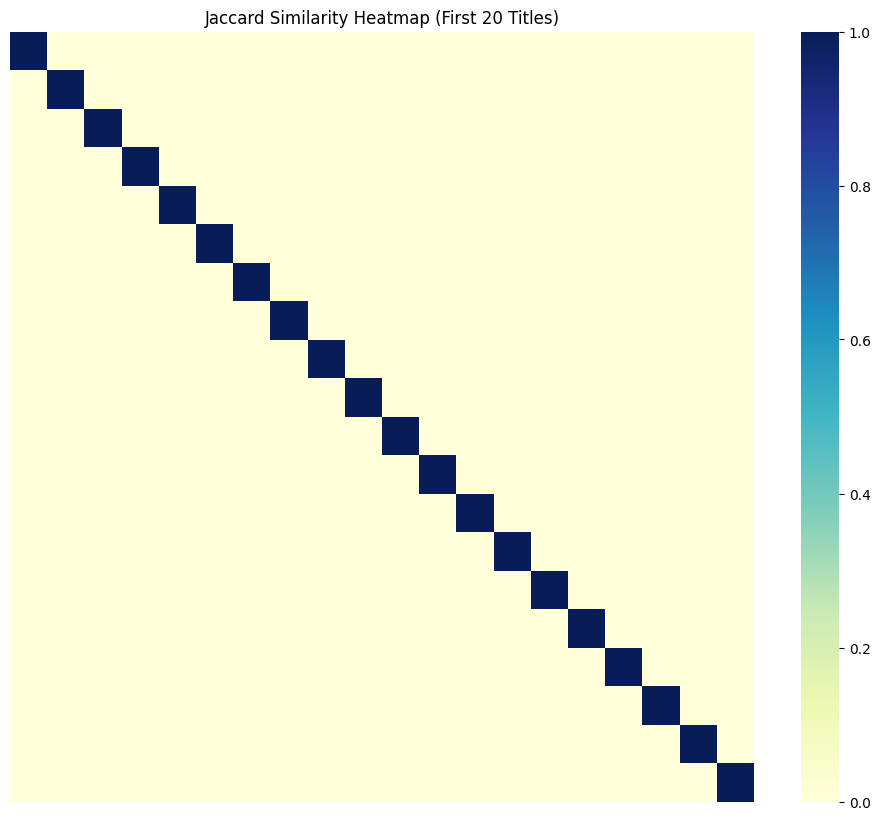

In [9]:
# 7. Plot similarity heatmap for the first 20 titles
plt.figure(figsize=(12, 10))
sns.heatmap(jaccard_similarity[:20, :20], cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Jaccard Similarity Heatmap (First 20 Titles)")
plot_path = os.path.join(output_dir, "plots")
os.makedirs(plot_path, exist_ok=True)
plt.savefig(os.path.join(plot_path, "jaccard_heatmap.png"))
plt.show()

In [10]:
import numpy as np
print("Max similarity:", np.max(jaccard_similarity))
print("Min similarity:", np.min(jaccard_similarity))
print("Mean similarity:", np.mean(jaccard_similarity))


Max similarity: 1.0
Min similarity: 0.0
Mean similarity: 0.0009575841934222383
